In [28]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [29]:
dataset = pd.read_pickle('../data/klybeckstrasse.pickle')
dataset.head()

,Total,Month,Day,Weekday,HourFrom
Time,,,,,
2019-01-31 20:00:00,41,1,31,3,20
2019-01-31 21:00:00,48,1,31,3,21
2019-01-31 22:00:00,39,1,31,3,22
2019-01-31 23:00:00,18,1,31,3,23
2019-02-01 00:00:00,13,2,1,4,0


In [30]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

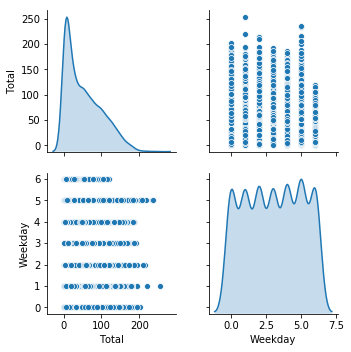

In [31]:
sns.pairplot(train_dataset[['Total', 'Weekday' ]], diag_kind='kde')

In [32]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,4650.0,53.680430,47.107733,0.0,12.0,42.0,86.0,254.0
Month,4650.0,5.515484,2.276035,0.0,4.0,6.0,7.0,9.0
Day,4650.0,15.685591,8.788110,0.0,8.0,16.0,23.0,31.0
Weekday,4650.0,3.029462,2.005958,0.0,1.0,3.0,5.0,6.0
HourFrom,4650.0,11.498925,6.925106,0.0,5.0,11.0,18.0,23.0


In [33]:
train_labels = train_dataset.pop('Weekday')
test_labels = test_dataset.pop('Weekday')

In [34]:
def norm(x):
  return(x-train_stats['mean']) / (train_stats['std'])

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [35]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  
  return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [36]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

ValueError: Error when checking input: expected dense_6_input to have shape (4,) but got array with shape (5,)